(16494, 11) 
 
 DATA TYPES
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object 
 
 First few rows
   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1       

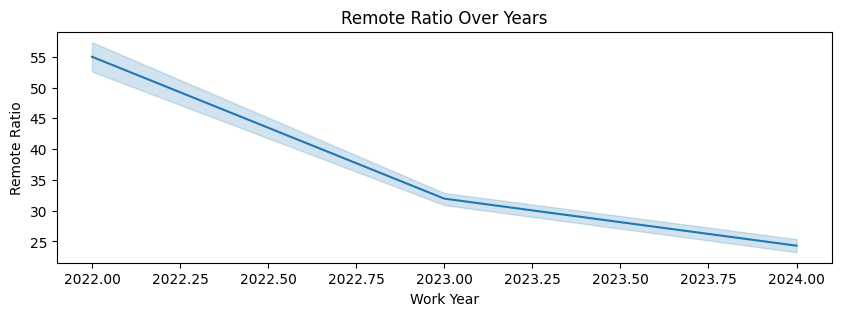

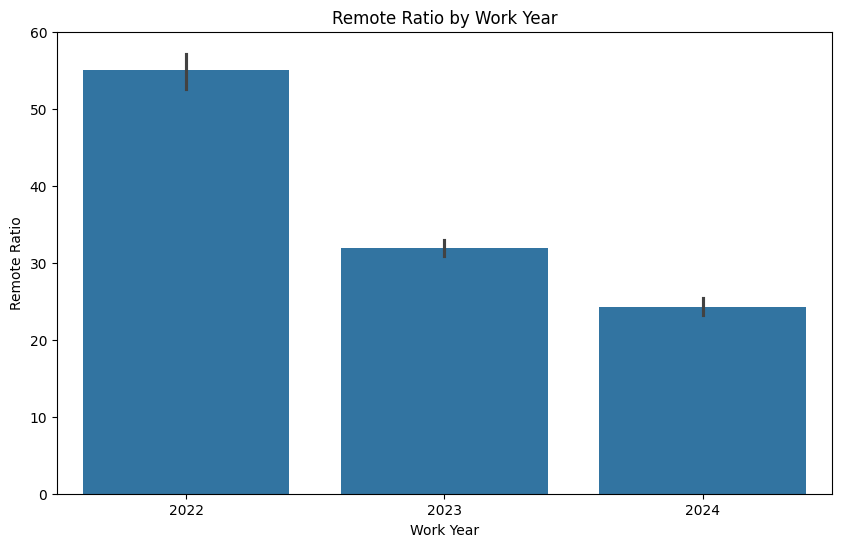

   salary_in_usd  work_year
0         120000       2024
1          70000       2024
2         130000       2024
3         110000       2024
4         240000       2024


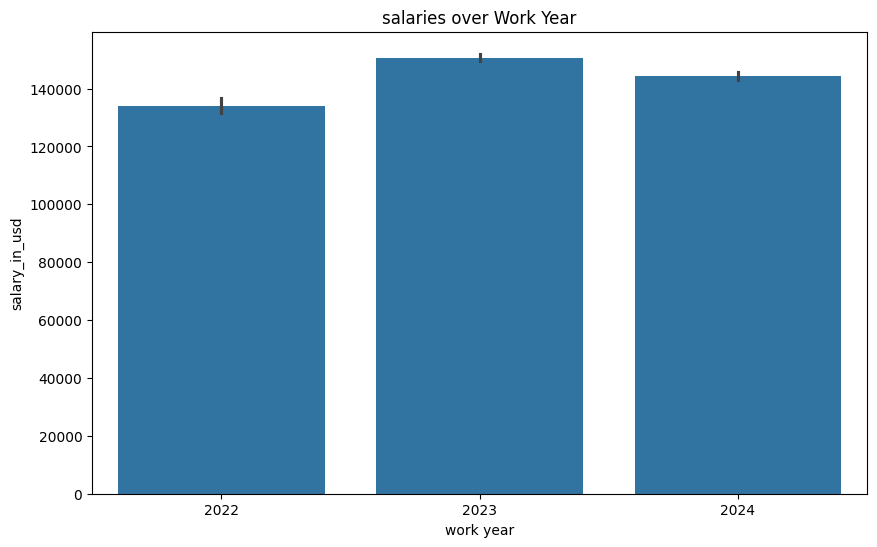

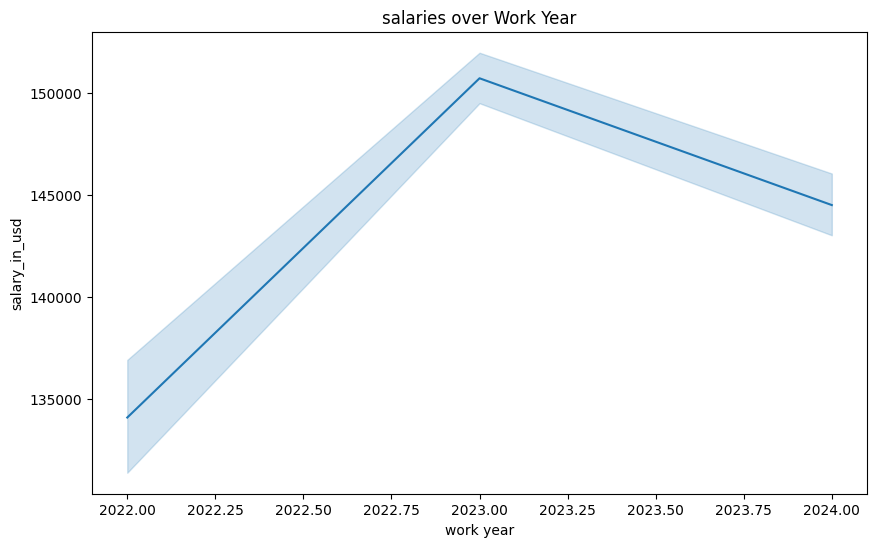

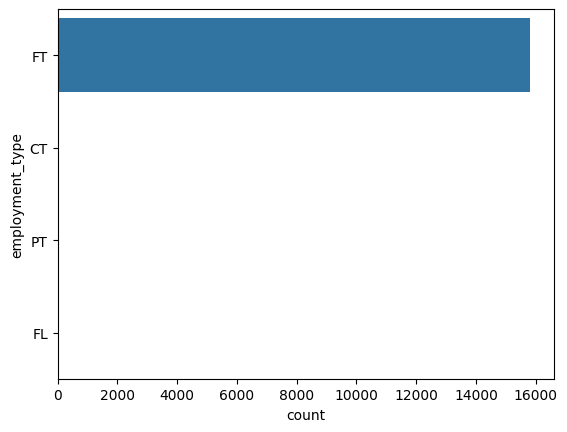

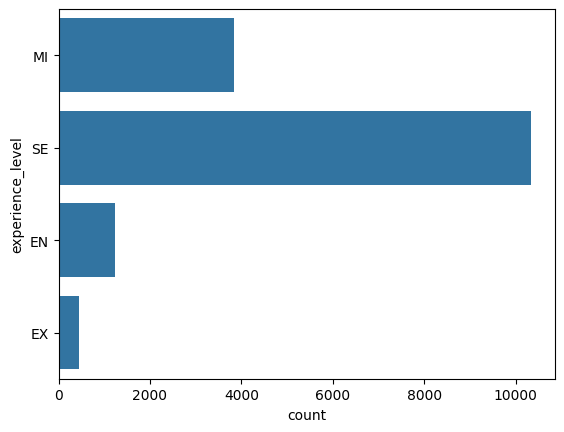

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('salaries.csv')

# Shape of the dataset
print(df.shape,"\n","\n","DATA TYPES")



# Data types of columns
print(df.dtypes,"\n","\n","First few rows")

# First few rows
print(df.head(),"\n","\n","Summery")

# Summary statistics
print(df.describe(),"\n","\n","Check iS null")

# Check for missing values
print(df.isnull().sum(),"\n","\n")

# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_columns,"\n","\n")

# Get the list of non-numeric (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


# Handling outliers (example using IQR)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Select only the relevant columns
df_selected = df[['work_year', 'remote_ratio']]
print(df_selected.head())

plt.figure(figsize=(10, 3))
sns.lineplot(data=df_selected, x='work_year', y='remote_ratio')
plt.title('Remote Ratio Over Years')
plt.xlabel('Work Year')
plt.ylabel('Remote Ratio')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_selected, x='work_year', y='remote_ratio')
plt.title('Remote Ratio by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Remote Ratio')
plt.show()


df_selected = df[['salary_in_usd', 'work_year']]
print(df_selected.head())

plt.figure(figsize=(10, 6))
sns.barplot(data=df_selected, x='work_year', y='salary_in_usd')
plt.title('salaries over Work Year')
plt.xlabel('work year')
plt.ylabel('salary_in_usd')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selected, x='work_year', y='salary_in_usd')
plt.title('salaries over Work Year')
plt.xlabel('work year')
plt.ylabel('salary_in_usd')
plt.show()




# Count plots for categorical columns
for column in [categorical_columns[1],categorical_columns[0]]:
    sns.countplot(y=column, data=df)
    plt.show()


